sift points
[[  6.93331671   7.248312    11.832057   ... 667.80841064 669.81555176
  673.81591797]
 [159.84971619 168.02153015 160.53501892 ... 443.54013062 187.69392395
  478.94451904]]
(2, 674)


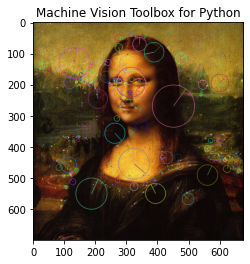

In [2]:
%matplotlib inline

# short python notebook to display sift.py functionality

# import numpy as np
import machinevisiontoolbox as mvt
import numpy as np

# import matplotlib.pyplot as plt
# import cv2 as cv 

im = mvt.iread('../images/monalisa.png')
s = mvt.Sift(im)

print('sift points')
print(s.pt)
print(s.pt.shape)

outim = s.drawSiftKeypoints(im)
mvt.idisp(outim)

In [4]:
# demonstrate getitem/slicing the sift object
# take a subset of the sift features

islice = slice(0,10,1)  # numpy slice object
print(islice)
strdescend = np.sort(s.strength, axis=0)[::-1]  # [::-1] switches array order, making this a descending sort, as opposed to an ascending sort, since np.soret does not have a descend option
print(strdescend[islice])

istrdescend = np.argsort(s.strength, axis=0)[::-1]
print(istrdescend[islice])
print(s.strength[istrdescend[islice]]) # check that we have the 10 strongest (should match above)

# take the 10 strongest sift features and plot them
print(istrdescend[islice])
strong10 = s[istrdescend[islice]]

print('strong10 strength = ', strong10.strength)
# should match above


slice(0, 10, 1)
[0.08660115 0.08660115 0.06179613 0.05494225 0.04717224 0.04700716
 0.04623311 0.04607937 0.04553887 0.04408762]
[369 368 344 335 295 254 392 304 347 428]
[0.08660115 0.08660115 0.06179613 0.05494225 0.04717224 0.04700716
 0.04623311 0.04607937 0.04553887 0.04408762]
[369 368 344 335 295 254 392 304 347 428]
strong10 strength =  [0.08660115 0.08660115 0.06179613 0.05494225 0.04717224 0.04700716
 0.04623311 0.04607937 0.04553887 0.04408762]


Matching SIFT


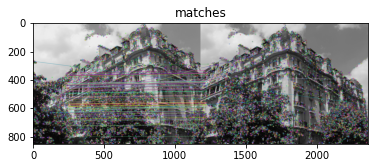

2742
1


169.04437255859375

In [12]:
print('Matching SIFT')

# read in images
im0 = mvt.iread('../images/building2-1.png')
im1 = mvt.iread('../images/building2-2.png')

# ensure grayscale
im0 = mvt.mono(im0)
im1 = mvt.mono(im1)

# call sift for each image (TODO combine im0 and im1 into sequence, sift.py cannot yet accept image sequences, but it is a straightforward update)
s0 = mvt.Sift(im0)
s1 = mvt.Sift(im1)

# draw sift keypoints for both images
d0 = s0.drawSiftKeypoints(im0)
#mvt.idisp(d0, title='d0')

d1 = s1.drawSiftKeypoints(im1)
# mvt.idisp(d1, title='d1')

# plot matches
m = s0.match(s0.descriptor, s1.descriptor)
dm = s0.drawSiftMatches(im0, s0, im1, s1, m[0:100])
mvt.idisp(dm, title='matches')

# access matches 
# matches[i][a].distance
# matches[i][a].imgIdx - which image it refers to
# matches[i][a].queryIdx - which feature it is looking at I assume
# matches[i][a].trainIdx?
print(len(m))
print(len(m[0]))
isiftmatch = 10
i = 0 # not sure if this would change if we had an image sequence, or if this is simply here so we have a list within list structure for the DMatch object from OpenCV
m[isiftmatch][i].distance
m[isiftmatch][i].imgIdx
m[isiftmatch][i].distance